# One-Period Binomial Option Pricing Model: Theory and Analysis Report

## Executive Summary

This report examines the implementation and theoretical foundations of the one-period binomial option pricing model, a fundamental tool in quantitative finance for valuing European options. The model demonstrates how to price derivatives using risk-neutral valuation principles and provides insights into option behavior through sensitivity analysis.

## 1. Theoretical Foundation

### 1.1 The Binomial Model Framework

The binomial model is a discrete-time approach to option pricing that assumes stock prices can only move in two directions (up or down) over a given time period. This simplification makes it an excellent pedagogical tool for understanding option pricing principles.

**Key Assumptions:**
- Stock prices follow a multiplicative binomial process
- Constant risk-free interest rate
- No dividends during the option's life
- Perfect market liquidity (no transaction costs)
- Continuous trading possibilities

### 1.2 Mathematical Formulation

**Stock Price Evolution:**
- Current stock price: S₀
- Up movement: S₀ × u (where u > 1)
- Down movement: S₀ × d (where d < 1)

**Critical Parameters:**
- **Up factor (u)**: u = e^(σ√T)
- **Down factor (d)**: d = 1/u = e^(-σ√T)
- **Risk-neutral probability (p)**: p = (e^(rT) - d)/(u - d)

Where:
- σ = volatility (annualized)
- T = time to expiration
- r = risk-free rate

### 1.3 Risk-Neutral Valuation

The model employs risk-neutral valuation, meaning we can price options as if investors are risk-neutral. This powerful concept allows us to:
- Use the risk-free rate for discounting
- Calculate expected payoffs using risk-neutral probabilities
- Avoid estimating risk premiums

**Option Pricing Formula:**
```
Option Price = e^(-rT) × [p × Payoff_up + (1-p) × Payoff_down]
```

## 2. Implementation Analysis

### 2.1 Real Market Data Integration

The code enhances theoretical understanding by incorporating real market data:

**Data Sources:**
- **Stock Prices**: Yahoo Finance API for current and historical prices
- **Volatility Calculation**: Annualized standard deviation of log returns over 252 trading days
- **Risk-Free Rate**: 10-year Treasury yield as proxy

**Volatility Calculation Method:**
```python
returns = np.log(hist['Close'] / hist['Close'].shift(1)).dropna()
volatility = returns.std() * np.sqrt(252)
```

This approach uses:
- Natural logarithm for continuous compounding
- Standard deviation of returns
- Square root of time scaling (252 trading days)

### 2.2 Option Pricing Mechanics

#### 2.2.1 European Call Options

**Payoff Structure:**
- At expiration: max(0, S_T - K)
- If stock price > strike: S_T - K
- If stock price ≤ strike: 0

**What the Code Shows:**
- Current theoretical option price
- Payoff scenarios for both up and down movements
- Probability-weighted expected value

#### 2.2.2 European Put Options

**Payoff Structure:**
- At expiration: max(0, K - S_T)
- If stock price < strike: K - S_T
- If stock price ≥ strike: 0

**Key Insight:** Put options gain value when stock prices fall, providing downside protection.

### 2.3 Put-Call Parity Verification

The code verifies the fundamental relationship:
```
C - P = S₀ - K×e^(-rT)
```

Where:
- C = call option price
- P = put option price
- S₀ = current stock price
- K = strike price
- r = risk-free rate
- T = time to expiration

**Significance:** This relationship ensures arbitrage-free pricing between calls and puts.

## 3. Visualization and Analysis

### 3.1 Binomial Tree Visualization

The tree diagrams illustrate:

**Stock Price Tree:**
- Shows possible stock price paths
- Displays risk-neutral probabilities
- Demonstrates the binary nature of price movements

**Option Payoff Tree:**
- Maps stock prices to option values
- Shows how option prices flow backward from expiration
- Illustrates risk-neutral valuation in action

### 3.2 Sensitivity Analysis (Greeks)

The code performs comprehensive sensitivity analysis across four dimensions:

#### 3.2.1 Delta (Price Sensitivity)
- **Definition**: Change in option price per unit change in stock price
- **Call Options**: Positive delta (0 to 1)
- **Put Options**: Negative delta (-1 to 0)
- **Interpretation**: Higher delta means greater sensitivity to stock price movements

#### 3.2.2 Vega (Volatility Sensitivity)
- **Definition**: Change in option price per unit change in volatility
- **Both Options**: Positive vega
- **Interpretation**: Higher volatility increases option value (more potential for profitable outcomes)

#### 3.2.3 Theta (Time Decay)
- **Definition**: Change in option price per unit change in time to expiration
- **Typical Pattern**: Options lose value as expiration approaches
- **Interpretation**: Time decay accelerates near expiration

#### 3.2.4 Strike Price Sensitivity
- **Call Options**: Higher strike prices reduce option value
- **Put Options**: Higher strike prices increase option value
- **Interpretation**: Reflects the moneyness of options

## 4. Key Findings and Insights

### 4.1 Model Behavior

**Risk-Neutral Probability:**
- Not the actual probability of up/down movements
- Derived from no-arbitrage conditions
- Ensures consistent pricing across all derivatives

**Up and Down Factors:**
- Directly related to volatility
- Higher volatility creates larger price movements
- Symmetric on logarithmic scale (u = 1/d)

### 4.2 Option Characteristics

**Call Options:**
- Benefit from upward stock movements
- Limited downside (maximum loss = premium paid)
- Unlimited upside potential

**Put Options:**
- Benefit from downward stock movements
- Limited upside (maximum gain = strike - premium)
- Provide portfolio insurance

### 4.3 Market Implications

**Volatility Impact:**
- Both call and put options increase in value with higher volatility
- Volatility is often the most challenging parameter to estimate
- Implied volatility from market prices often differs from historical volatility

**Time Value:**
- Options are wasting assets (lose value over time)
- At-the-money options have maximum time value
- Deep in-the-money options have minimal time value

## 5. Limitations and Extensions

### 5.1 Model Limitations

**Simplifying Assumptions:**
- Only two possible outcomes per period
- Constant volatility and risk-free rate
- No early exercise (European options only)
- No dividends or transaction costs

**Real-World Considerations:**
- Actual stock prices follow more complex processes
- Volatility changes over time (volatility clustering)
- Interest rates fluctuate
- Market frictions exist

### 5.2 Practical Extensions

**Multi-Period Models:**
- Extend to multiple time steps for better accuracy
- Converges to Black-Scholes model as periods increase
- Allows for American option pricing

**Advanced Features:**
- Dividend adjustments
- Stochastic volatility
- Jump processes
- Transaction costs

## 6. Educational Value

### 6.1 Conceptual Understanding

The model demonstrates:
- **No-arbitrage pricing**: Fundamental principle of derivatives pricing
- **Risk-neutral valuation**: Powerful mathematical technique
- **Hedging concepts**: How to create risk-free portfolios
- **Option behavior**: How various factors affect option prices

### 6.2 Practical Applications

**Portfolio Management:**
- Understanding option sensitivities for hedging
- Risk assessment of option positions
- Strategic option selection

**Risk Management:**
- Measuring portfolio Greeks
- Stress testing under different scenarios
- Hedging specific risks

## 7. Conclusion

The one-period binomial model serves as an excellent introduction to option pricing theory. While simplified, it captures the essential features of option behavior and provides intuitive understanding of complex financial concepts. The implementation with real market data bridges the gap between theory and practice, demonstrating how mathematical models apply to actual trading situations.

The visualizations and sensitivity analysis reveal the nuanced relationships between option prices and underlying factors, providing insights valuable for both academic understanding and practical application in finance.

**Key Takeaways:**
1. Options derive their value from underlying asset volatility and time
2. Risk-neutral valuation eliminates the need to estimate risk premiums
3. Put-call parity ensures consistent pricing relationships
4. Sensitivity analysis (Greeks) provides crucial risk management insights
5. Real market data validation enhances model credibility

This foundation prepares for more advanced topics including multi-period binomial models, Black-Scholes pricing, and exotic option structures.

Fetching real market data...

Real Market Data for AAPL:
Current Stock Price: $211.16
Annualized Volatility: 31.79%
Risk-free Rate: 4.42%

Binomial Model Parameters:
Up factor (u): 1.1723
Down factor (d): 0.8530
Risk-neutral probability (p): 0.4952

European Call Option (Strike: $211.16):
Option Price: $17.82
Payoff if stock goes up to $247.54: $36.38
Payoff if stock goes down to $180.13: $0.00

European Put Option (Strike: $211.16):
Option Price: $15.49
Payoff if stock goes up to $247.54: $0.00
Payoff if stock goes down to $180.13: $31.03

Put-Call Parity Check: 0.000000 (should be close to 0)

Generating visualizations...
1. Call Option Binomial Tree


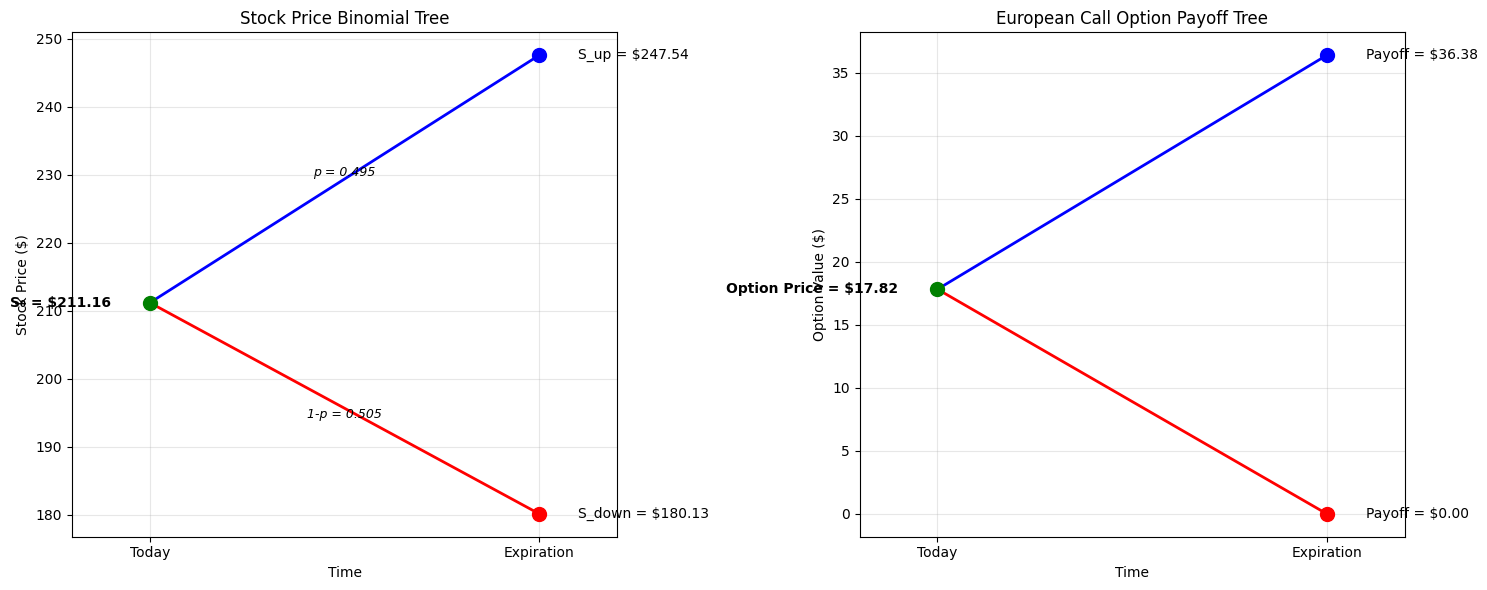

2. Put Option Binomial Tree


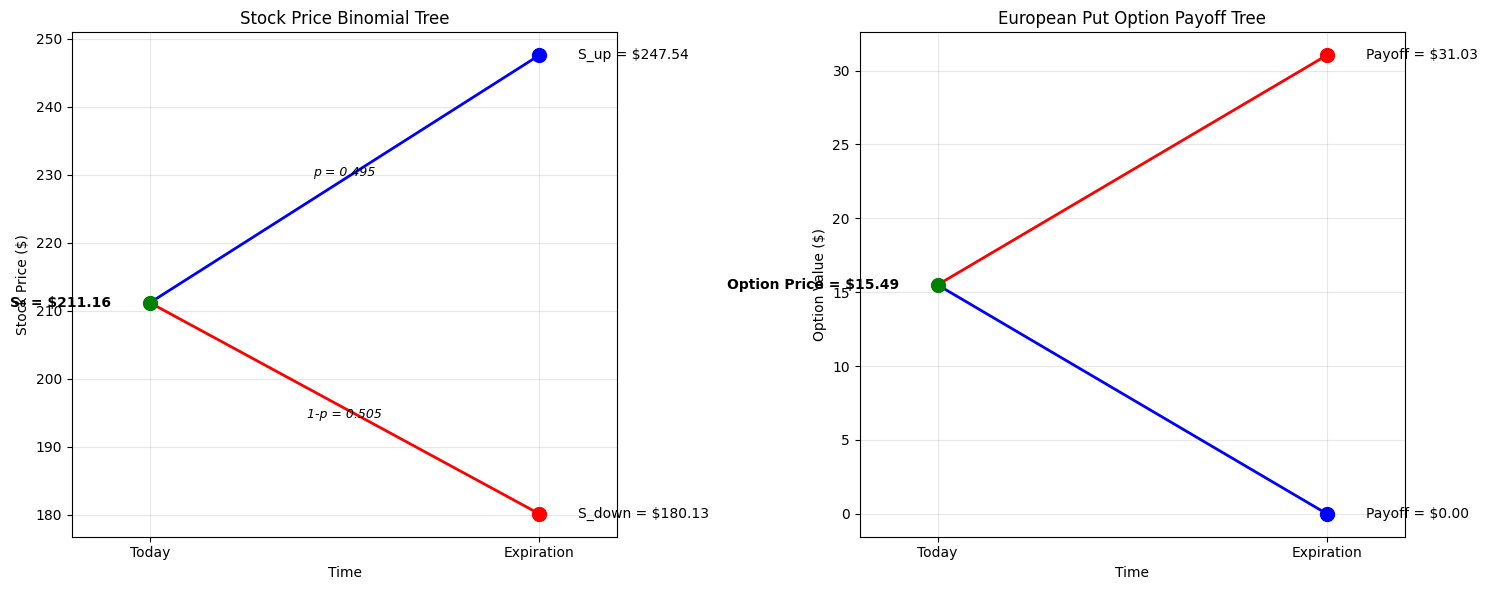

3. Call Option Sensitivity Analysis


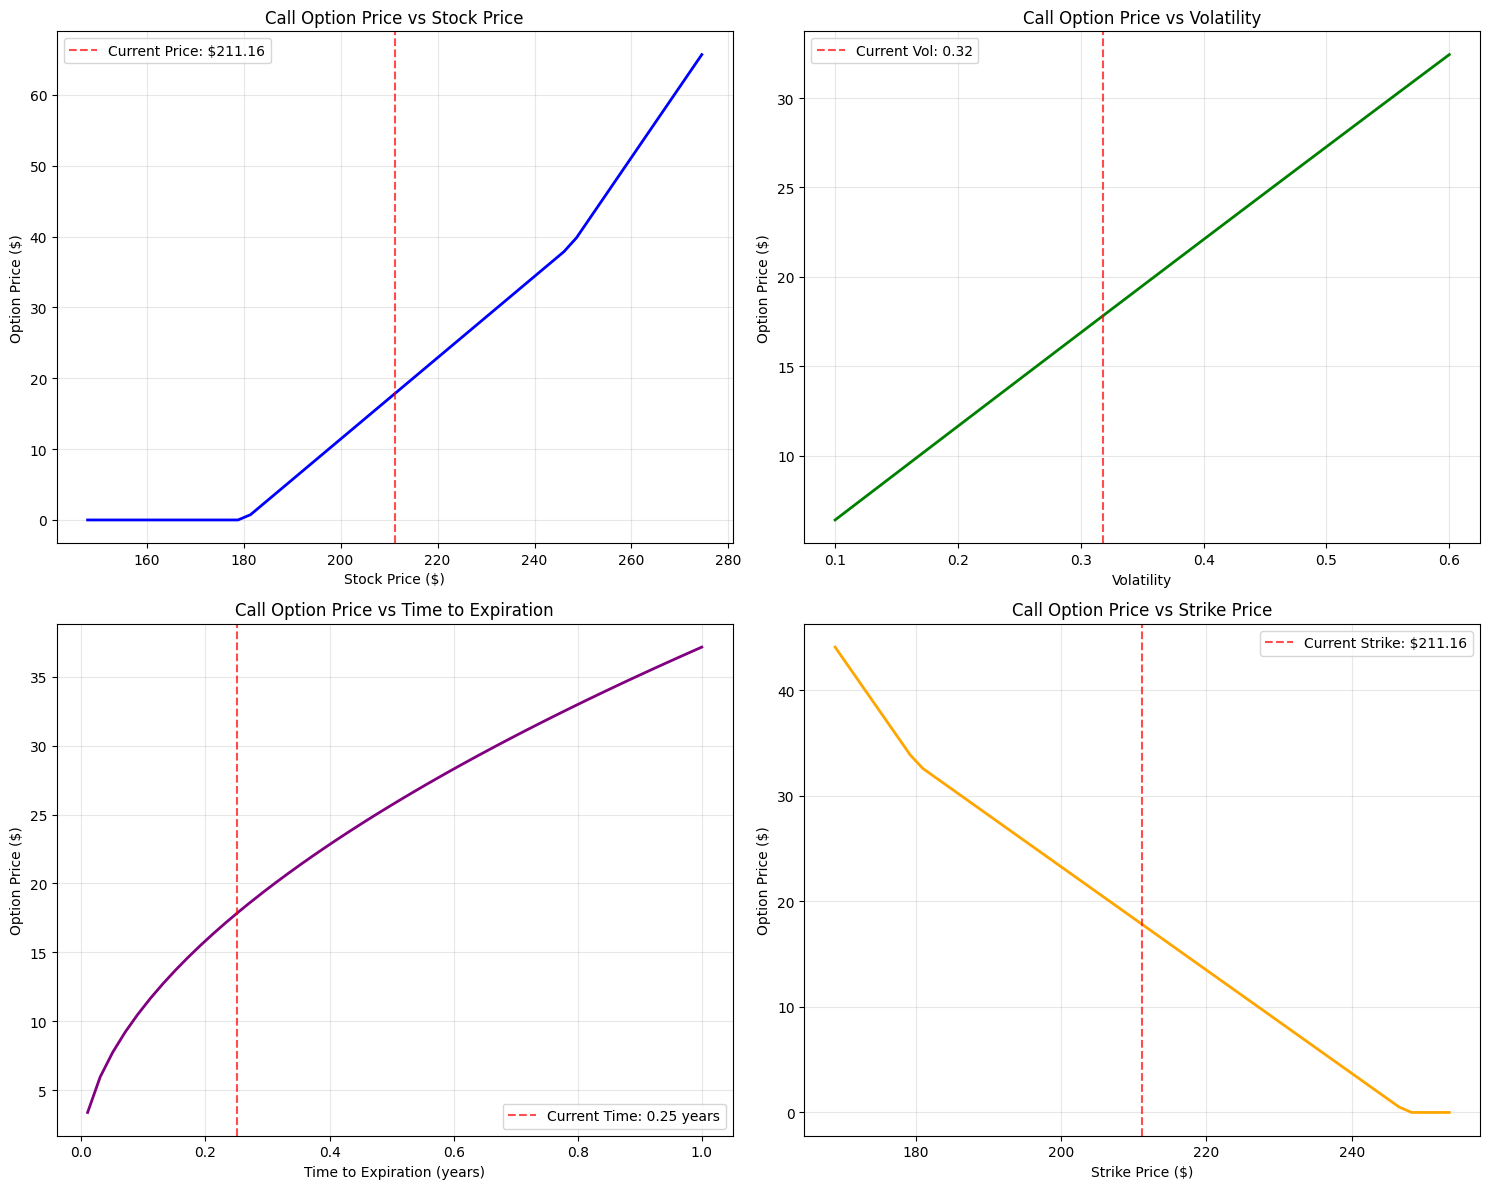

4. Put Option Sensitivity Analysis


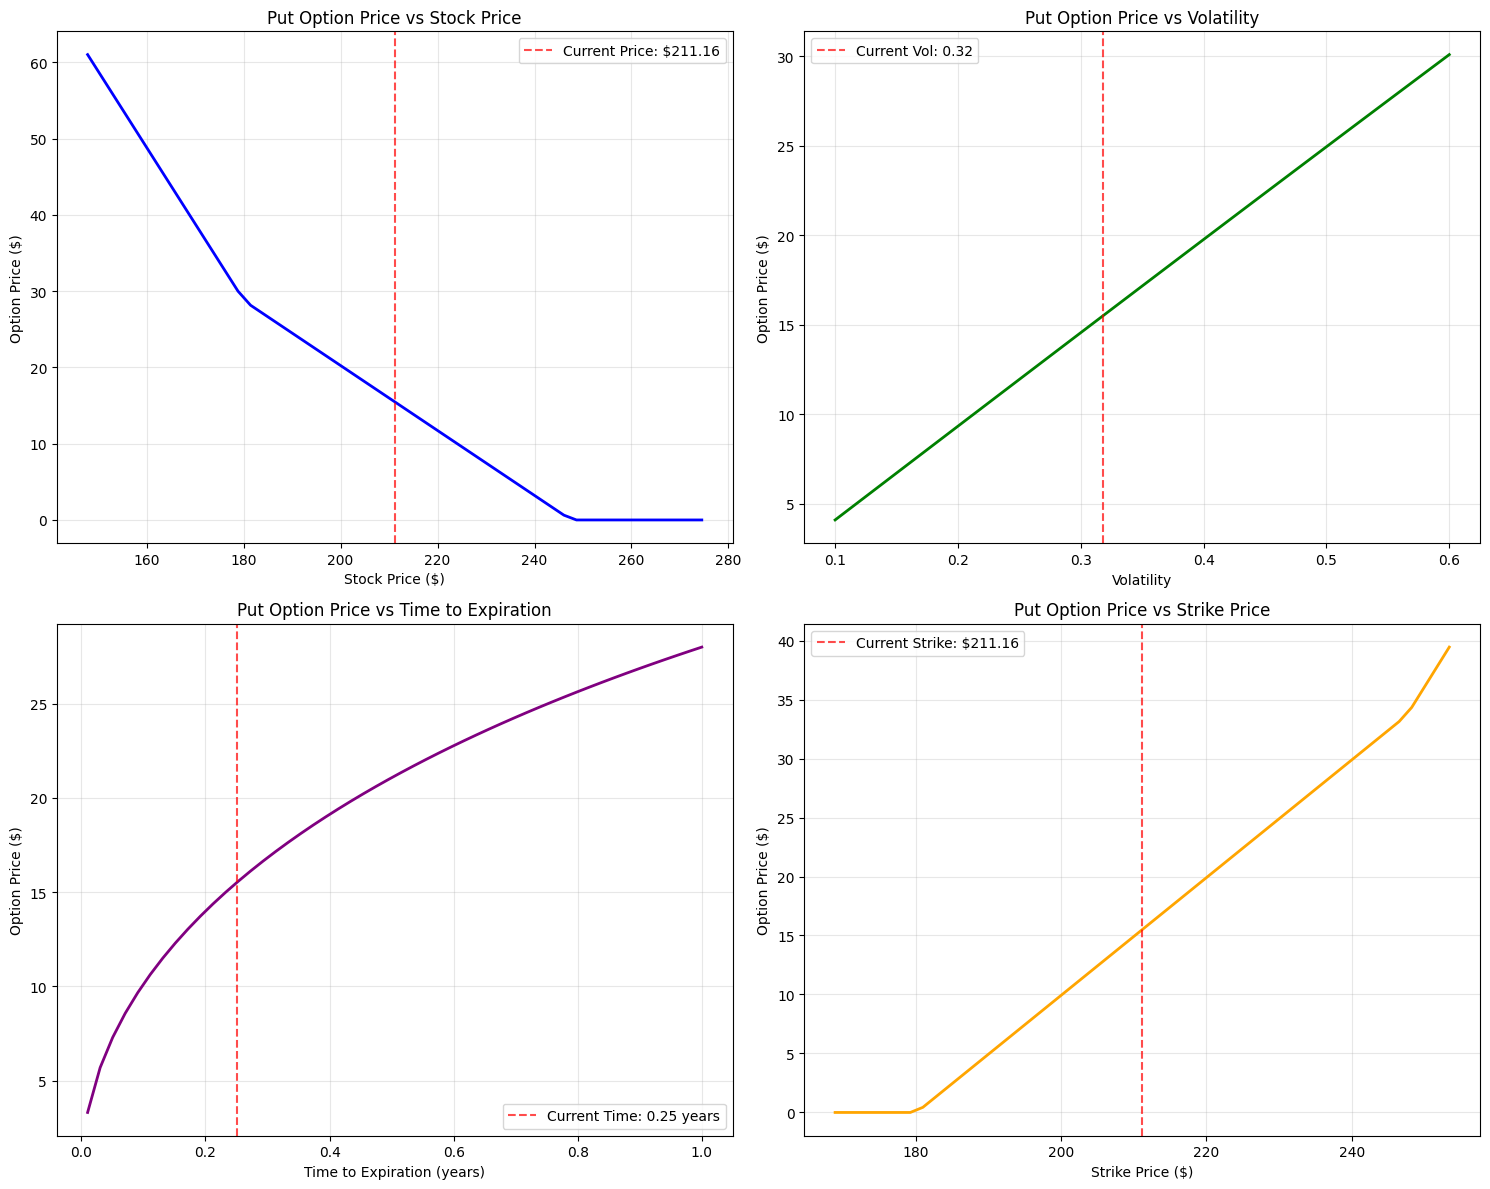

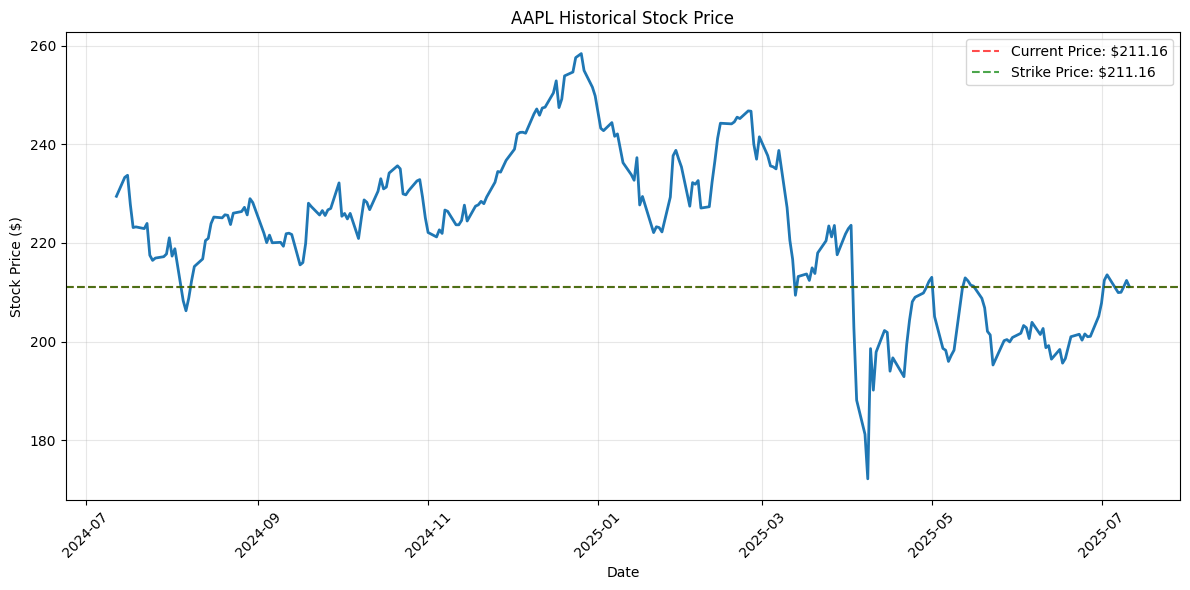


Analysis complete!


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd

class BinomialModel:
    """One-period binomial model for option pricing"""
    
    def __init__(self, S0, K, T, r, sigma):
        """
        Initialize the binomial model parameters
        
        Parameters:
        S0: Current stock price
        K: Strike price
        T: Time to expiration (in years)
        r: Risk-free rate
        sigma: Volatility
        """
        self.S0 = S0
        self.K = K
        self.T = T
        self.r = r
        self.sigma = sigma
        
        # Calculate binomial parameters
        self.u = np.exp(sigma * np.sqrt(T))  # Up factor
        self.d = 1 / self.u  # Down factor
        self.p = (np.exp(r * T) - self.d) / (self.u - self.d)  # Risk-neutral probability
        
    def european_call_price(self):
        """Calculate European call option price"""
        # Stock prices at expiration
        S_up = self.S0 * self.u
        S_down = self.S0 * self.d
        
        # Option payoffs at expiration
        C_up = max(0, S_up - self.K)
        C_down = max(0, S_down - self.K)
        
        # Current option price (discounted expected value)
        call_price = np.exp(-self.r * self.T) * (self.p * C_up + (1 - self.p) * C_down)
        
        return call_price, S_up, S_down, C_up, C_down
    
    def european_put_price(self):
        """Calculate European put option price"""
        # Stock prices at expiration
        S_up = self.S0 * self.u
        S_down = self.S0 * self.d
        
        # Option payoffs at expiration
        P_up = max(0, self.K - S_up)
        P_down = max(0, self.K - S_down)
        
        # Current option price (discounted expected value)
        put_price = np.exp(-self.r * self.T) * (self.p * P_up + (1 - self.p) * P_down)
        
        return put_price, S_up, S_down, P_up, P_down

def get_real_market_data(ticker="AAPL", period="1y"):
    """Fetch real market data and calculate parameters"""
    try:
        # Download stock data
        stock = yf.Ticker(ticker)
        hist = stock.history(period=period)
        
        # Get current price
        current_price = hist['Close'].iloc[-1]
        
        # Calculate volatility (annualized)
        returns = np.log(hist['Close'] / hist['Close'].shift(1)).dropna()
        volatility = returns.std() * np.sqrt(252)  # 252 trading days
        
        # Get risk-free rate (approximate with 10-year Treasury)
        treasury = yf.Ticker("^TNX")
        treasury_hist = treasury.history(period="5d")
        risk_free_rate = treasury_hist['Close'].iloc[-1] / 100  # Convert percentage to decimal
        
        return current_price, volatility, risk_free_rate, hist
    
    except Exception as e:
        print(f"Error fetching data: {e}")
        # Return default values if API fails
        return 150.0, 0.25, 0.05, None

def visualize_binomial_tree(model, option_type="call"):
    """Visualize the one-period binomial tree"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    if option_type == "call":
        option_price, S_up, S_down, payoff_up, payoff_down = model.european_call_price()
        title = "European Call Option"
    else:
        option_price, S_up, S_down, payoff_up, payoff_down = model.european_put_price()
        title = "European Put Option"
    
    # Plot 1: Stock Price Tree
    ax1.plot([0, 1], [model.S0, S_up], 'b-', linewidth=2, label=f'Up: ${S_up:.2f}')
    ax1.plot([0, 1], [model.S0, S_down], 'r-', linewidth=2, label=f'Down: ${S_down:.2f}')
    ax1.scatter([0], [model.S0], color='green', s=100, zorder=5)
    ax1.scatter([1], [S_up], color='blue', s=100, zorder=5)
    ax1.scatter([1], [S_down], color='red', s=100, zorder=5)
    
    # Annotations for stock prices
    ax1.annotate(f'S₀ = ${model.S0:.2f}', (0, model.S0), xytext=(-0.1, model.S0), 
                ha='right', va='center', fontsize=10, fontweight='bold')
    ax1.annotate(f'S_up = ${S_up:.2f}', (1, S_up), xytext=(1.1, S_up), 
                ha='left', va='center', fontsize=10)
    ax1.annotate(f'S_down = ${S_down:.2f}', (1, S_down), xytext=(1.1, S_down), 
                ha='left', va='center', fontsize=10)
    
    # Add probability labels
    ax1.text(0.5, (model.S0 + S_up) / 2, f'p = {model.p:.3f}', 
             ha='center', va='bottom', fontsize=9, style='italic')
    ax1.text(0.5, (model.S0 + S_down) / 2, f'1-p = {1-model.p:.3f}', 
             ha='center', va='top', fontsize=9, style='italic')
    
    ax1.set_xlim(-0.2, 1.2)
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Stock Price ($)')
    ax1.set_title('Stock Price Binomial Tree')
    ax1.grid(True, alpha=0.3)
    ax1.set_xticks([0, 1])
    ax1.set_xticklabels(['Today', 'Expiration'])
    
    # Plot 2: Option Payoff Tree
    ax2.plot([0, 1], [option_price, payoff_up], 'b-', linewidth=2)
    ax2.plot([0, 1], [option_price, payoff_down], 'r-', linewidth=2)
    ax2.scatter([0], [option_price], color='green', s=100, zorder=5)
    ax2.scatter([1], [payoff_up], color='blue', s=100, zorder=5)
    ax2.scatter([1], [payoff_down], color='red', s=100, zorder=5)
    
    # Annotations for option values
    ax2.annotate(f'Option Price = ${option_price:.2f}', (0, option_price), 
                xytext=(-0.1, option_price), ha='right', va='center', 
                fontsize=10, fontweight='bold')
    ax2.annotate(f'Payoff = ${payoff_up:.2f}', (1, payoff_up), 
                xytext=(1.1, payoff_up), ha='left', va='center', fontsize=10)
    ax2.annotate(f'Payoff = ${payoff_down:.2f}', (1, payoff_down), 
                xytext=(1.1, payoff_down), ha='left', va='center', fontsize=10)
    
    ax2.set_xlim(-0.2, 1.2)
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Option Value ($)')
    ax2.set_title(f'{title} Payoff Tree')
    ax2.grid(True, alpha=0.3)
    ax2.set_xticks([0, 1])
    ax2.set_xticklabels(['Today', 'Expiration'])
    
    plt.tight_layout()
    plt.show()

def analyze_option_sensitivity(S0, K, T, r, sigma, option_type="call"):
    """Analyze option price sensitivity to various parameters"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Sensitivity to stock price
    stock_prices = np.linspace(S0 * 0.7, S0 * 1.3, 50)
    option_prices = []
    
    for S in stock_prices:
        model = BinomialModel(S, K, T, r, sigma)
        if option_type == "call":
            price, _, _, _, _ = model.european_call_price()
        else:
            price, _, _, _, _ = model.european_put_price()
        option_prices.append(price)
    
    axes[0, 0].plot(stock_prices, option_prices, 'b-', linewidth=2)
    axes[0, 0].axvline(x=S0, color='r', linestyle='--', alpha=0.7, label=f'Current Price: ${S0:.2f}')
    axes[0, 0].set_xlabel('Stock Price ($)')
    axes[0, 0].set_ylabel('Option Price ($)')
    axes[0, 0].set_title(f'{option_type.capitalize()} Option Price vs Stock Price')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].legend()
    
    # Sensitivity to volatility
    volatilities = np.linspace(0.1, 0.6, 50)
    option_prices = []
    
    for vol in volatilities:
        model = BinomialModel(S0, K, T, r, vol)
        if option_type == "call":
            price, _, _, _, _ = model.european_call_price()
        else:
            price, _, _, _, _ = model.european_put_price()
        option_prices.append(price)
    
    axes[0, 1].plot(volatilities, option_prices, 'g-', linewidth=2)
    axes[0, 1].axvline(x=sigma, color='r', linestyle='--', alpha=0.7, label=f'Current Vol: {sigma:.2f}')
    axes[0, 1].set_xlabel('Volatility')
    axes[0, 1].set_ylabel('Option Price ($)')
    axes[0, 1].set_title(f'{option_type.capitalize()} Option Price vs Volatility')
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].legend()
    
    # Sensitivity to time to expiration
    times = np.linspace(0.01, 1.0, 50)
    option_prices = []
    
    for t in times:
        model = BinomialModel(S0, K, t, r, sigma)
        if option_type == "call":
            price, _, _, _, _ = model.european_call_price()
        else:
            price, _, _, _, _ = model.european_put_price()
        option_prices.append(price)
    
    axes[1, 0].plot(times, option_prices, 'purple', linewidth=2)
    axes[1, 0].axvline(x=T, color='r', linestyle='--', alpha=0.7, label=f'Current Time: {T:.2f} years')
    axes[1, 0].set_xlabel('Time to Expiration (years)')
    axes[1, 0].set_ylabel('Option Price ($)')
    axes[1, 0].set_title(f'{option_type.capitalize()} Option Price vs Time to Expiration')
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].legend()
    
    # Sensitivity to strike price
    strikes = np.linspace(K * 0.8, K * 1.2, 50)
    option_prices = []
    
    for strike in strikes:
        model = BinomialModel(S0, strike, T, r, sigma)
        if option_type == "call":
            price, _, _, _, _ = model.european_call_price()
        else:
            price, _, _, _, _ = model.european_put_price()
        option_prices.append(price)
    
    axes[1, 1].plot(strikes, option_prices, 'orange', linewidth=2)
    axes[1, 1].axvline(x=K, color='r', linestyle='--', alpha=0.7, label=f'Current Strike: ${K:.2f}')
    axes[1, 1].set_xlabel('Strike Price ($)')
    axes[1, 1].set_ylabel('Option Price ($)')
    axes[1, 1].set_title(f'{option_type.capitalize()} Option Price vs Strike Price')
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].legend()
    
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Get real market data
    print("Fetching real market data...")
    ticker = "AAPL"  # Apple Inc.
    current_price, volatility, risk_free_rate, hist_data = get_real_market_data(ticker)
    
    print(f"\nReal Market Data for {ticker}:")
    print(f"Current Stock Price: ${current_price:.2f}")
    print(f"Annualized Volatility: {volatility:.2%}")
    print(f"Risk-free Rate: {risk_free_rate:.2%}")
    
    # Option parameters
    strike_price = current_price  # At-the-money option
    time_to_expiration = 0.25  # 3 months
    
    # Create binomial model
    model = BinomialModel(current_price, strike_price, time_to_expiration, risk_free_rate, volatility)
    
    print(f"\nBinomial Model Parameters:")
    print(f"Up factor (u): {model.u:.4f}")
    print(f"Down factor (d): {model.d:.4f}")
    print(f"Risk-neutral probability (p): {model.p:.4f}")
    
    # Calculate call option price
    call_price, S_up, S_down, C_up, C_down = model.european_call_price()
    print(f"\nEuropean Call Option (Strike: ${strike_price:.2f}):")
    print(f"Option Price: ${call_price:.2f}")
    print(f"Payoff if stock goes up to ${S_up:.2f}: ${C_up:.2f}")
    print(f"Payoff if stock goes down to ${S_down:.2f}: ${C_down:.2f}")
    
    # Calculate put option price
    put_price, S_up, S_down, P_up, P_down = model.european_put_price()
    print(f"\nEuropean Put Option (Strike: ${strike_price:.2f}):")
    print(f"Option Price: ${put_price:.2f}")
    print(f"Payoff if stock goes up to ${S_up:.2f}: ${P_up:.2f}")
    print(f"Payoff if stock goes down to ${S_down:.2f}: ${P_down:.2f}")
    
    # Verify Put-Call Parity
    parity_check = call_price - put_price - (current_price - strike_price * np.exp(-risk_free_rate * time_to_expiration))
    print(f"\nPut-Call Parity Check: {parity_check:.6f} (should be close to 0)")
    
    # Visualizations
    print("\nGenerating visualizations...")
    
    # Visualize call option
    print("1. Call Option Binomial Tree")
    visualize_binomial_tree(model, "call")
    
    # Visualize put option
    print("2. Put Option Binomial Tree")
    visualize_binomial_tree(model, "put")
    
    # Sensitivity analysis for call option
    print("3. Call Option Sensitivity Analysis")
    analyze_option_sensitivity(current_price, strike_price, time_to_expiration, 
                             risk_free_rate, volatility, "call")
    
    # Sensitivity analysis for put option
    print("4. Put Option Sensitivity Analysis")
    analyze_option_sensitivity(current_price, strike_price, time_to_expiration, 
                             risk_free_rate, volatility, "put")
    
    # Plot historical stock price
    if hist_data is not None:
        plt.figure(figsize=(12, 6))
        plt.plot(hist_data.index, hist_data['Close'], linewidth=2)
        plt.axhline(y=current_price, color='r', linestyle='--', alpha=0.7, 
                   label=f'Current Price: ${current_price:.2f}')
        plt.axhline(y=strike_price, color='g', linestyle='--', alpha=0.7, 
                   label=f'Strike Price: ${strike_price:.2f}')
        plt.xlabel('Date')
        plt.ylabel('Stock Price ($)')
        plt.title(f'{ticker} Historical Stock Price')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    
    print("\nAnalysis complete!")